A/B testing technique is used for test & learn in terms of what works & what doesn't works.
AB Testing could be performed for plethora of reasons - most common being to lean on how to improve conversions or nudge customers towards desired CTA (Call to Action) or drive more traffic. This helps in understanding and test feature changes, layouts and UI/UX.

**Objective**
Determine the efficacy of a new web page design in driving conversions compared to the existing design.

**Approach**  
I. Probability based  
II. Hypothesis Test  
III. Regression based  


**Key Insights**
1. A/B test results indicate a preference for the current web page. The conversion rate uplift with the new design was not statistically significant.  
2. Extended testing duration could potentially yield different outcomes.  

**Recommendation**  
Maintain the current web page design for now, but consider longer experimentation for a more definitive conclusion.

# 1. Probability Approach  
- Objective: To understand probability of conversions based on different conditions, contributing to the evaluation of the new web page design's effectiveness.

2. Scenarios for probability :  
- Probability of converting regardless of the page received.  
- Probability of converting given that an individual is in the control group.  
- Probability of converting given that an individual is in the treatment group.  
- Probability that an individual received the new page.  

3. Conclusion:  
- Probability-based approach to analyze the A/B test results suggests that there may not be a significant difference in conversion rates between the old and new page designs.
- The analysis could be further enhanced by performing hypothesis testing, such as a Z-test or T-test, to determine the statistical significance of the observed differences.

In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
%matplotlib inline

random.seed(42)

1. Reading file & creating the dataframe

In [4]:
# mount google drive
from google.colab import files, drive

drive.mount('/gdrive')

# read the 1st required file
val_set='/gdrive/My Drive/AB Testing/ab_data.csv'

df = pd.read_csv(val_set)
df.head()

Mounted at /gdrive


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [5]:
# number of rows in the dataset
print('Number of rows: {}'.format(df.shape[0]))
print('Number of columns: {}'.format(df.shape[1]))

Number of rows: 294478
Number of columns: 5


In [6]:
# number of unique users in the dataset.
print('{} unique users'.format(df.user_id.nunique()))

290584 unique users


In [7]:
# proportion of users who had converted
print('Proportion of users converted = {:.5f}%'.format(df.converted.sum() / df.shape[0] * 100))

Proportion of users converted = 11.96592%


In [8]:
#  number of times the new_page and treatment don't match.
num_not_match = df[((df.landing_page == 'new_page') & (df.group != 'treatment')) |
               ((df.landing_page == 'old_page') & (df.group != 'control'))].shape[0]
print("The number of times the new_page and treatment don't match is {}".format(num_not_match))

The number of times the new_page and treatment don't match is 3893


In [9]:
# Do any of the rows have missing values?
print('Number of rows with missing values = {}'.format(df.isnull().any(axis = 1).sum()))

Number of rows with missing values = 0


2. For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.


In [10]:
# remove all rows where the number of times the new_page and treatment don't match
index_for_no_match = df[((df.landing_page == 'new_page') & (df.group != 'treatment')) |
                        ((df.landing_page == 'old_page') & (df.group != 'control'))].index
df2 = df.drop(index = index_for_no_match)

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

3. Investigate the dataframe after the change performed in previous step.

a. How many unique **user_id**s are in **df2**?

In [12]:
print('{} unique users'.format(df2.user_id.nunique()))

290584 unique users


b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
print('The one user_id repeated in df2 is {}'.format(df2[df2.user_id.duplicated()].iloc[0, 0]))

The one user_id repeated in df2 is 773192


c. What is the row information for the repeat **user_id**?

In [14]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
# remove duplicte user_id as row values are consistent
df2 = df2.drop(index = df2[df2.user_id.duplicated()].index)

In [16]:
# verify for duplicate user ids
df2.user_id.duplicated().sum()

0

`4.` Find probabilites using **df2**

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
prob_regardless_page = (df.converted == 1).mean()
print('Probability of converting regardless of page is {:.5f}'.format(prob_regardless_page))

Probability of converting regardless of page is 0.11966


b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
prob_control_group = ((df.group == 'control') & (df.converted == 1)).sum() / (df.group == 'control').sum()
print('Probability of converting given that individual is in control group is {:.5f}'.format(prob_control_group))

Probability of converting given that individual is in control group is 0.12040


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
prob_treatment_group = ((df.group == 'treatment') & (df.converted == 1)).sum() / (df.group == 'treatment').sum()
print('Probability of converting given that individual is in treatment group is {:.5f}'.format(prob_treatment_group))

Probability of converting given that individual is in treatment group is 0.11892


d. What is the probability that an individual received the new page?

In [20]:
prob_indi_recieved_page = (df.landing_page == 'new_page').mean()
print('probability that an individual received the new page is {:.5f}'.format(prob_indi_recieved_page))

probability that an individual received the new page is 0.50000


Bringing in all results from parts (a) through (d) above:
- Probability of converting regardless of page is `0.11966`.
- Probability of converting given that individual is in control group is `0.12040`.
- Probability of converting given that individual is in treatment group is `0.11892`.
- probability that an individual received the new page is `0.50000`.

From these results, I believe that implementing new page will not increase the conversion rate. **_However there isn't sufficient imformation to conclude this for sure because the difference in probability is very less._**

# II. A/B Test

Availability of the time stamp associated with each event enables to run a hypothesis test as each observation was observed.  

Tricky question - Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  
These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider making the decision just based on all the data provided.  
Example: Assuming that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, state hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$H_0$ - assumes that the new page is not better, or at least not significantly better, than the old page.  
$H_1$ - assumes that new page is definitely better than the old page in terms of conversion rates.

$$H_0: p_{new} - p_{old} \le 0$$
$$H_1: p_{new} - p_{old} > 0$$


`2.` Assuming under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal.   
Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page.

Using a sample size for each page equal to the ones in the initial data - ab_data.csv.  

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  

a. What is the **conversion rate** for $p_{new}$ under the null?

In [21]:
p_new = (df2.converted == 1).mean()
print('The conversion rate for p_new under the null is {:.5f}'.format(p_new))

The conversion rate for p_new under the null is 0.11960


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [22]:
p_old = (df2.converted == 1).mean()
print('The conversion rate for p_old under the null is {:.5f}'.format(p_old))

The conversion rate for p_old under the null is 0.11960


c. What is $n_{new}$, the number of individuals in the treatment group?

In [23]:
n_new = df2[df2.group == 'treatment'].shape[0]
print('The number of individuals in the treatment group is {}'.format(n_new))

The number of individuals in the treatment group is 145310


d. What is $n_{old}$, the number of individuals in the control group?

In [24]:
n_old = df2[df2.group == 'control'].shape[0]
print('The number of individuals in the treatment group is {}'.format(n_old))

The number of individuals in the treatment group is 145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
new_page_converted = np.random.binomial(1, p_new, n_new)

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
old_page_converted = np.random.binomial(1, p_old, n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
obs_diff = new_page_converted.mean() - old_page_converted.mean()
obs_diff

0.001119634541984632

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [28]:
# simulate for 10000 times
p_diffs = []
for i in range(10000):
    new_page_converted = np.random.binomial(1, p_new, n_new)
    old_page_converted = np.random.binomial(1, p_old, n_old)
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

In [29]:
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

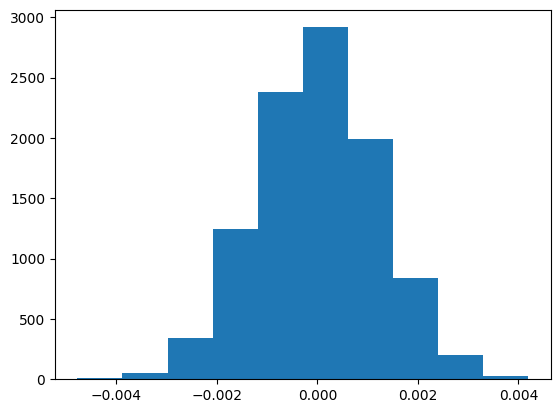

In [30]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [31]:
# calculate actual observed difference
p_diff_orig = df[df['landing_page'] == 'new_page']['converted'].mean() -  df[df['landing_page'] == 'old_page']['converted'].mean()

In [32]:
(p_diffs > p_diff_orig).mean()

0.915

k.  
- The value that is computed in step j is called as `p-value` which is defined as **_if null hypothesis is true, the probability of obtaining the observed statistic or one or more extreme in favour of the alternative hypothesis._**

- The `p-value` is dependent on alternative hypothesis. Based on the alternative hypothesis, shade the region and find the area under the shaded region to obtain p-value.

What does p-value val mean in terms of whether or not there is a difference between the new and old pages?

- In this test the `p-value` is `0.9124` which points towards fail to reject the null hypothesis at a Type 1 error of `5%` which means that the performance of new page is equal to the old page in terms of conversion rate at this null hypothesised value.  
However we cannot say for sure whether the new page is worse than old page.

- Deriving p-value grom library - statsmodels.  
Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [33]:
import statsmodels.api as sm

convert_old = ((df.converted == 1) & (df.landing_page == 'old_page')).sum()
convert_new = ((df.converted == 1) & (df.landing_page == 'new_page')).sum()
n_old = (df.landing_page == 'old_page').sum()
n_new = (df.landing_page == 'new_page').sum()

m. Now use `stats.proportions_ztest` to compute test statistic and p-value.

In [34]:
# perform z_test
z_score, p_value = proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = 'smaller')
print('p_value: {}'.format(p_value))
print('z_score: {}'.format(z_score))

p_value: 0.9143962454534289
z_score: 1.3683341399998907


n. What do the z-score and p-value computed earlier in the previous question **j.** and **k.** mean for the conversion rates of the old and new pages?   
Does this new derivation agree with the findings in **j.** and **k.** parts?

- Note that in the earlier derivatuon the hypotheses were `one sided` while in the `z_test` the hypotheses are `two sided`.
- The `p_value` of `0.914` still suggests towards failing to reject the null at the type 1 error rate of `5%`. That is the new page is same as the old page in terms of conversion rate.
- While the `z_score` of `1.3683` informs how far from mean of distribution a point lies and this value is used for calculating the `p_value`.
- Finally, these values agree with the findings in parts j and k.



# III. Regression approach

`1.` Compare the result achieved in the A/B test in Part II above can also be achieved by performing regression.

a. Use **Logistic Regression**, since each row is either a conversion or no conversion.  

Objectibe:   
Use **statsmodels** to fit the regression model specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  

Approach:
1. Create an intercept **intercept** column - creating an intercept column is part of the logistic regression model setup, and it is used to account for the baseline or inherent likelihood of conversion (success) when no treatment or page change is applied.  
- The intercept term captures the baseline probability of the event being modeled (in this case, conversion) when all predictor variables are zero.  
- Intercept represents the baseline log-odds of conversion when an individual receives the control page (old page).  
- The intercept is a constant term that allows the logistic regression model to have a starting point or baseline from which the effects of other predictor variables (like the page type) can be assessed.  
2. Add a dummy variable column about which page each user has  received - an **ab_page** column, which is equal to 1 when an individual receives the **treatment** and 0 if he's in **control** set.

In [35]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [36]:
df2['intercept'] = 1
df2['ab_page'] = df2.group.map({'treatment': 1, 'control': 0})
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [37]:
# perform logistic regression on data
model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [38]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Method:           MLE        
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2024-01-15 13:18 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           LLR p-value:      0.18988    
No. Iterations:     6.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>

- The `p-value` associated with `ab_page` is `0.1899` and it is different from what we have in part 2 because of the following reason:
  - The setup for hypothesis test in part 2 is one tailed that is
$$H_0: p_{new} - p_{old} \le 0$$
$$H_1: p_{new} - p_{old} > 0$$
  - While the setup for hypothesis considered by regression model is two tailed that is
$$H_0: p_{new} - p_{old} = 0$$
$$H_1: p_{new} - p_{old} \not= 0$$
- So inorder to get the same `p-value` we have do the following:
>$pvalue_{onetailed} = 1 - \frac{0.1899}{2} = 0.91$


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

- It is good idea to consider other factors to add in regression model to understand how other factors would effect the results. There will be number of factors that correlate to the response variable that your predicting and hence considering them can yeild different results.
- But considering mutliple factors can bring in the following potential problems:
  - Multicollinearity
  - Non-linearity of the response-predictor relationships
  - Correlation of error terms
  - Outliers

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. I will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables.

Does it appear that country had an impact on conversion?

In [40]:
# read the 1st required file
val_set='/gdrive/My Drive/AB Testing/countries.csv'

df_country = pd.read_csv(val_set)
df_country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [41]:
# join df2 dataframe with df_country dataframe
df_new = df2.join(df_country.set_index('user_id'), on = 'user_id')

In [42]:
df_new.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [43]:
df_new.country.unique()

array(['US', 'CA', 'UK'], dtype=object)

In [44]:
# 0, 1 encoding for country attribute
df_new[['US', 'CA', 'UK']] = pd.get_dummies(df_new['country'])

In [45]:
df_new.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,US,CA,UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [46]:
# conversion rate for US
us_conv = ((df_new.country == 'US') & (df_new.converted == 1)).sum() / (df_new.country == 'US').sum()
print('The conversion rate when page is viewed from US is {}'.format(us_conv))

The conversion rate when page is viewed from US is 0.1195468006423762


In [47]:
# conversion rate for CA
ca_conv = ((df_new.country == 'CA') & (df_new.converted == 1)).sum() / (df_new.country == 'CA').sum()
print('The conversion rate when page is viewed from CA is {}'.format(ca_conv))

The conversion rate when page is viewed from CA is 0.11531829781364232


In [48]:
# conversion rate for UK
uk_conv = ((df_new.country == 'UK') & (df_new.converted == 1)).sum() / (df_new.country == 'UK').sum()
print('The conversion rate when page is viewed from UK is {}'.format(uk_conv))

The conversion rate when page is viewed from UK is 0.12059448568984076


- It seems like country has impact on conversion rate as it varies from country to country.
- Highest being for `UK` with approximately `12%` and least being for `US` with approximately `11.9%`.

h. Though I have now looked at the individual factors of country and page on conversion, I would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.

In [49]:
df_new.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,US,CA,UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [50]:
# perform logistic regression on data with countries
logi_model = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'US', 'CA']])
results = logi_model.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Method:           MLE        
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2024-01-15 13:20 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           LLR p-value:      0.17599    
No. Iterations:     6.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
US           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
CA            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
==================================================================

"""

In [51]:
# interpreting logistic regression model coefficients
1/np.exp(-0.0149), 1/np.exp(-0.0408), np.exp(0.0099)

(1.0150115583846535, 1.0416437559600236, 1.0099491671175422)

In [52]:
# find end and start of test
df_new.timestamp.max(), df_new.timestamp.min()

('2017-01-24 13:41:54.460509', '2017-01-02 13:42:05.378582')

In [53]:
from datetime import datetime

# calculate test duration
fmt = '%Y-%m-%d %H:%M:%S'
tstamp1 = datetime.strptime('2017-01-24 13:41:54', fmt)
tstamp2 = datetime.strptime('2017-01-02 13:42:05', fmt)

td = tstamp1 - tstamp2
print('The test is conducted for just over {} days'.format(td.days))

The test is conducted for just over 21 days


### Summary & Conclusions
- If an individual is from UK, they are `1.0416` times more likely to be `converted` than if they are from US, holding all other variables constant.
- If an individual is from CA, they are `1.009` times more likely to be `converted` than if they are from UK, holding all other variables constant.
- It is observed that the difference in conversion rates for different countries is small which may be not practically significant.

**Based on p_values we again say that we failed to reject the null at a type 1 error rate of `5%`. This implies that the new page is same as the old page in terms of conversion rate.**

Finally, I would suggest the company to stick with the old page or else conduct the test for longer time to better understand whether or not to implement the new page(from this data it seems like the test is conducted for just over 21 days which may not be sufficient to better understand the results).